Problem Statement:


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In this dataset we need to make two predictions
* Fuel Type

*  capacity_mw

First we will predict capacity_mw prediction, since the target variable "capacity_mw" has continuous data so it is a "Regression problem". After this will move to Fuel Type prediction which is "Classfication problem".

In [3]:
# Importing Necessery liabraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [2]:
#  Importing dataset
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\My Data\Datasets\global-power-plant-database-master\output_database\global_power_plant_database.csv")

In [3]:
# Printing first five rows of  the dataset
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

# Here we have 33643 rows and 25 columns

(33643, 25)

In [5]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
other_fuel1                 31680
other_fuel2                 33340
other_fuel3                 33539
commissioning_year          17340
owner                       14112
source                         15
url                            18
geolocation_source            419
wepp_id                     17262
year_of_capacity_data       19900
generation_gwh_2013         26648
generation_gwh_2014         26213
generation_gwh_2015         25234
generation_gwh_2016         24297
generation_gwh_2017         23974
generation_data_source      23380
estimated_generation_gwh     8137
dtype: int64

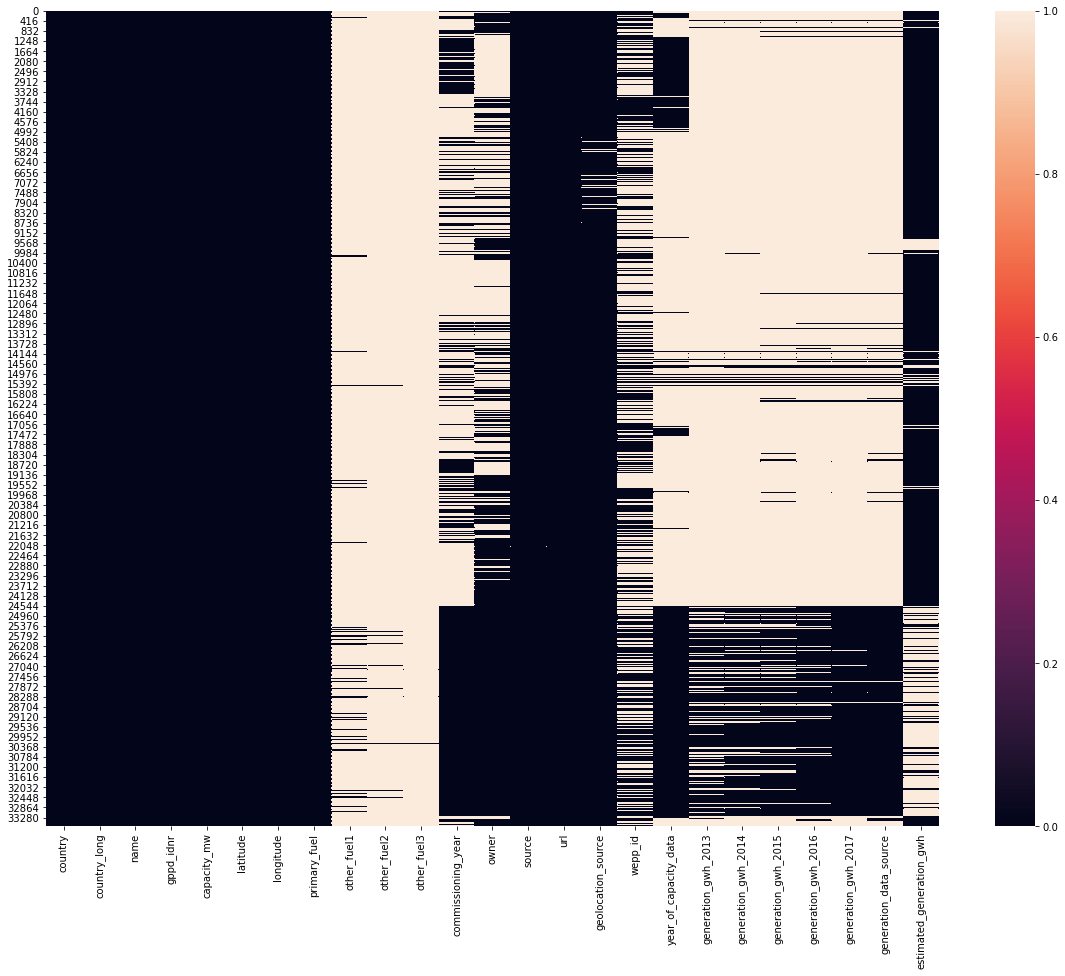

In [6]:
plt.figure(figsize = (20,15))
sns.heatmap(df.isnull())
plt.show()

We see here many of our columns have null values, Filling this may imbalace our model so we will drop columns with many null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33643 entries, 0 to 33642
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   33643 non-null  object 
 1   country_long              33643 non-null  object 
 2   name                      33643 non-null  object 
 3   gppd_idnr                 33643 non-null  object 
 4   capacity_mw               33643 non-null  float64
 5   latitude                  33643 non-null  float64
 6   longitude                 33643 non-null  float64
 7   primary_fuel              33643 non-null  object 
 8   other_fuel1               1963 non-null   object 
 9   other_fuel2               303 non-null    object 
 10  other_fuel3               104 non-null    object 
 11  commissioning_year        16303 non-null  float64
 12  owner                     19531 non-null  object 
 13  source                    33628 non-null  object 
 14  url   

There are 12 object and 13 float or integer datatype columns in our dataset

In [8]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [10]:
df['country'].nunique()

167

In [11]:
df['country_long'].nunique()

167

In [12]:
df['commissioning_year'].nunique()

2035

In [13]:
df['source'].nunique()

866

In [14]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

We are dropping following columns from our dataset - 

* country_long - As country is same columns with short names

* Name - Name of a power plant is irrelevant for prediction

* gppd_idnr - This is again some specific id given to plant , irrelevant for prediction

* other_fuel1/other_fuel2/other_fuel3 - More than 90 % of missing values (Nans)

* url - Irrelavant for prediction

* wepp_id - This column is again a unique id for a power plant
 
* commissioning_year - More null values and unable to fill due by mode

* year_of_capacity_data - More than 60 % of null values



In [15]:
# Dropping columns
df.drop(['country_long', 'name', 'gppd_idnr', 'other_fuel1', 'other_fuel2', 'other_fuel3','url', 'wepp_id','commissioning_year','owner','year_of_capacity_data','generation_data_source'], axis = 1 , inplace = True)

In [16]:
df.shape

(33643, 13)

Filling null values

In [17]:

df['source'].value_counts()

U.S. Energy Information Administration           8644
Wiki-Solar                                       3733
UK Renewable Energy Planning Database            2413
Open Power System Data                           2404
Agência Nacional de Energia Elétrica (Brazil)    2340
                                                 ... 
Aftaab Solar Private Limited (ASPL)                 1
CEE PVF Ahlhorn (I-V) GmbH & Co KG                  1
Przdsiębiorstwo Energetyczne Megawat S.A.           1
Reliance Petrochemicals                             1
Sahacogen Co Ltd                                    1
Name: source, Length: 866, dtype: int64

In [18]:
df['source'] = df['source'].fillna('U.S. Energy Information Administration')

In [19]:

df['geolocation_source'].value_counts()

U.S. Energy Information Administration                                                 8644
Wiki-Solar                                                                             3733
WRI                                                                                    2870
UK Renewable Energy Planning Database                                                  2413
Open Power System Data                                                                 2389
Agência Nacional de Energia Elétrica (Brazil)                                          2338
GEODB                                                                                  1788
UNFCCC CDM Registry                                                                    1598
Industry About                                                                         1327
CARMA                                                                                  1295
Natural Resources Canada                                                        

In [20]:
df['geolocation_source'] = df['geolocation_source'].fillna('U.S. Energy Information Administration')

In [21]:
# filling null values with median in numerical columns
df.fillna(df.mean()[0], inplace=True)

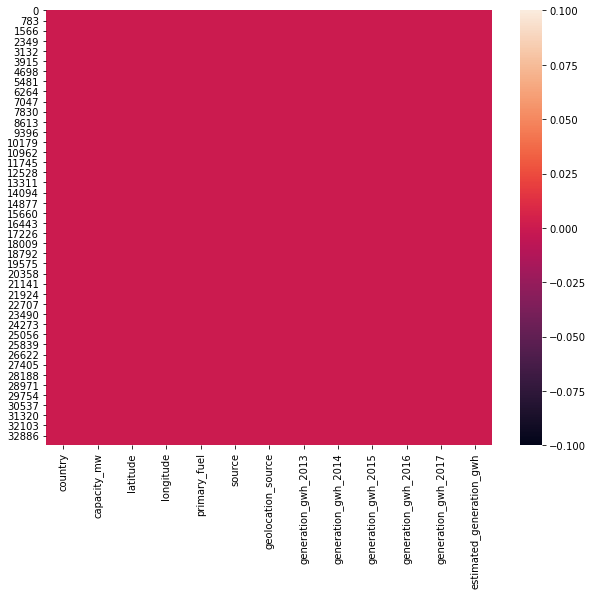

In [22]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isnull())
plt.show()

We can see all null values in our dataset are filled

In [23]:
# Checking for Duplicated values 
df.duplicated().sum()


82

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.duplicated().sum()

0

In [26]:
# Printing final shape

print("No of rows and columns After data cleaining", df.shape)#

No of rows and columns After data cleaining (33561, 13)


In [27]:
# Chacking Stats for the data
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,33561.000000,33561.000000,33561.000000,33561.000000,33561.000000,33561.000000,33561.000000,33561.000000,33561.000000
mean,169.239291,32.511268,-4.256718,277.443294,276.667551,316.133926,313.584194,322.552271,590.610706
std,499.006263,22.972257,78.354445,1084.869729,1068.251627,1285.893649,1282.854357,1311.998468,3295.866361
min,1.000000,-77.847000,-179.977700,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,0.000000
25%,5.000000,28.365000,-76.272700,168.992503,168.992503,168.992503,168.992503,168.992503,13.092678
50%,18.200000,39.591100,-1.274400,168.992503,168.992503,168.992503,168.992503,168.992503,117.353559
75%,80.420000,46.474600,60.807000,168.992503,168.992503,168.992503,168.992503,168.992503,168.992503
max,22500.000000,71.292000,179.388700,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,450562.692350


In [28]:
df.columns


Index(['country', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'source', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'estimated_generation_gwh'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

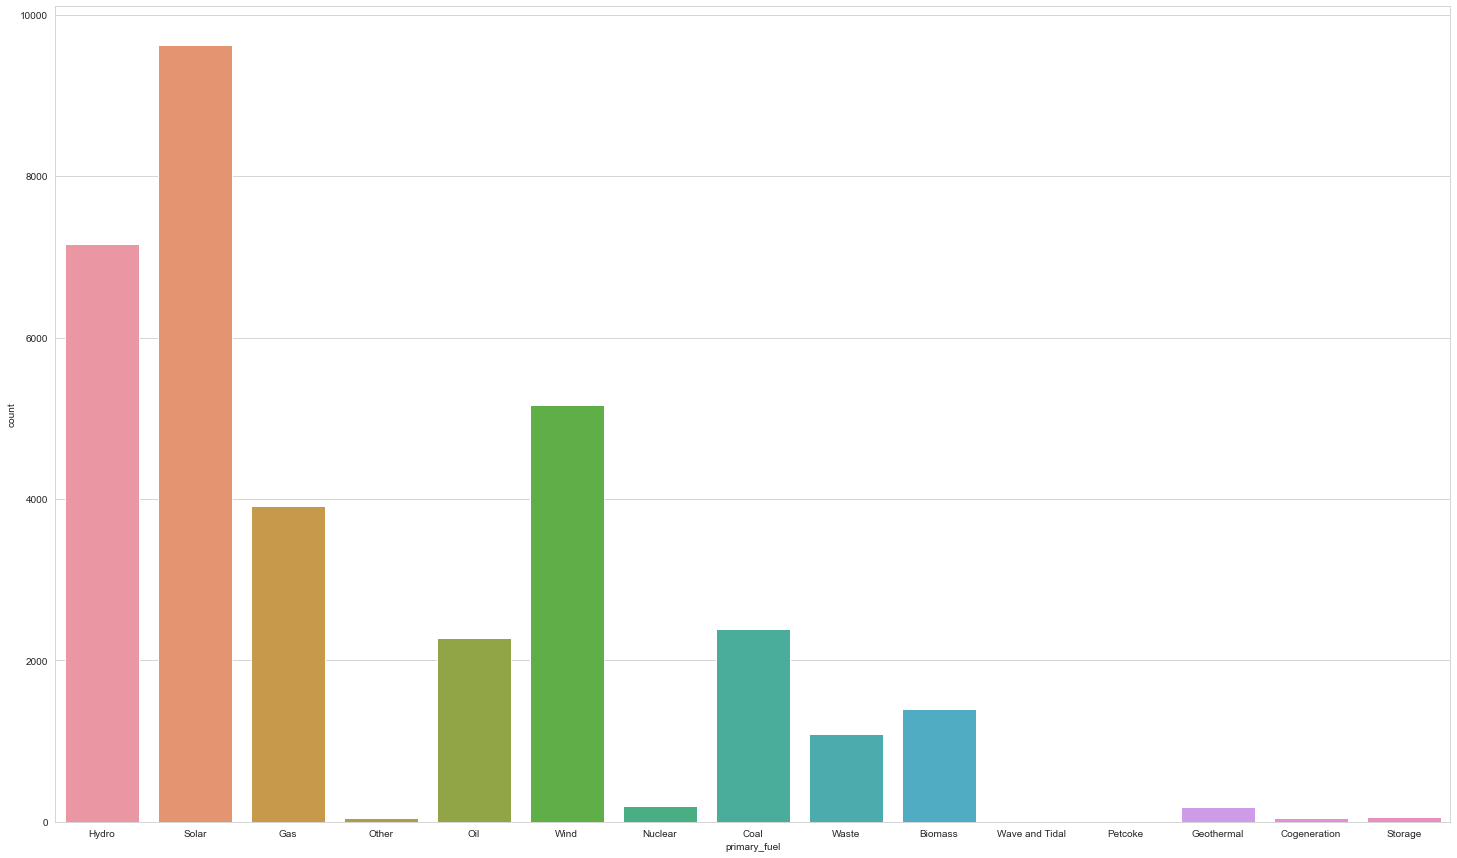

In [29]:
plt.figure(figsize = (25,15))
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

We can see in aove graph that There are more number of plants using Solar and Hydro as their primary fuel

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

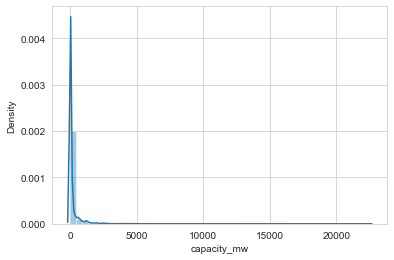

In [30]:
sns.distplot(df['capacity_mw'])

As we can see capacity is distributed betwwn 0 to 1000 and skewed to right

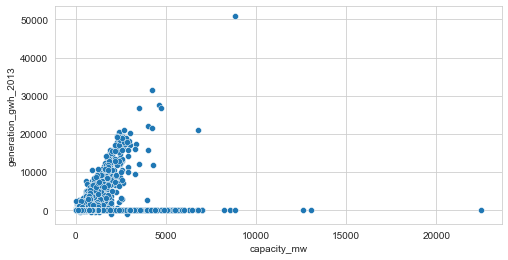

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)
plt.show()


We can see Capacity in MW is proportionate to the Generation in Gwh

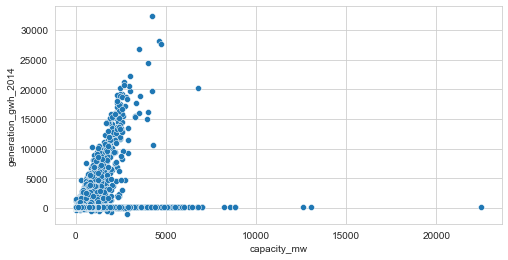

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)
plt.show()

In the year 2014 we can see more generation with same capacities compare to 2013

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

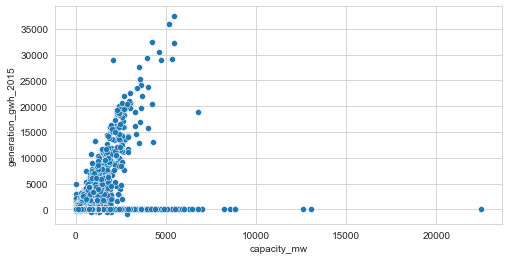

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

n the year 2015 we can see more generation with same capacities compare to 2014

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

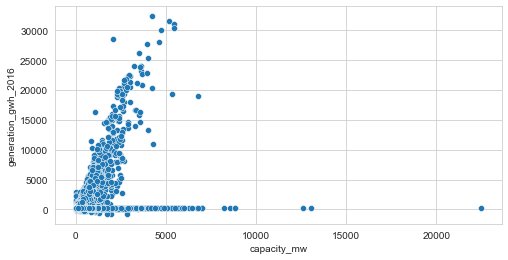

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

We can see in year 2016 we have huighest Power generation compared to 2014 and 2015

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

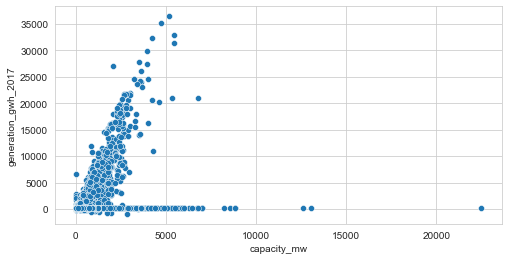

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

We can say there is no significant rise in Generation Mw as in year 2016 to 2017

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33561 entries, 0 to 33642
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   33561 non-null  object 
 1   capacity_mw               33561 non-null  float64
 2   latitude                  33561 non-null  float64
 3   longitude                 33561 non-null  float64
 4   primary_fuel              33561 non-null  object 
 5   source                    33561 non-null  object 
 6   geolocation_source        33561 non-null  object 
 7   generation_gwh_2013       33561 non-null  float64
 8   generation_gwh_2014       33561 non-null  float64
 9   generation_gwh_2015       33561 non-null  float64
 10  generation_gwh_2016       33561 non-null  float64
 11  generation_gwh_2017       33561 non-null  float64
 12  estimated_generation_gwh  33561 non-null  float64
dtypes: float64(9), object(4)
memory usage: 4.6+ MB


we need to convert Catregorical columns before processing

In [37]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
df['country']=le.fit_transform(df['country'])

df['primary_fuel']=le.fit_transform(df['primary_fuel'])

df['source']=le.fit_transform(df['source'])

df['geolocation_source']=le.fit_transform(df['geolocation_source'])


In [39]:
df

,country,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,0,33.0,32.3220,65.1190,5,262,10,168.992503,168.992503,168.992503,168.992503,168.992503,168.992503
1,0,10.0,31.6700,65.7950,10,837,27,168.992503,168.992503,168.992503,168.992503,168.992503,168.992503
2,0,10.0,31.6230,65.7920,10,837,27,168.992503,168.992503,168.992503,168.992503,168.992503,168.992503
3,0,66.0,34.5560,69.4787,5,262,10,168.992503,168.992503,168.992503,168.992503,168.992503,168.992503
4,0,100.0,34.6410,69.7170,5,262,10,168.992503,168.992503,168.992503,168.992503,168.992503,168.992503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33638,165,50.0,-12.9667,28.6333,7,220,21,168.992503,168.992503,168.992503,168.992503,168.992503,120.872642
33639,165,20.0,-12.8167,28.2000,7,220,21,168.992503,168.992503,168.992503,168.992503,168.992503,48.349057
33640,165,108.0,-17.9167,25.8500,5,220,21,168.992503,168.992503,168.992503,168.992503,168.992503,702.100000
33641,166,920.0,-18.3835,26.4700,1,262,10,168.992503,168.992503,168.992503,168.992503,168.992503,4397.000000


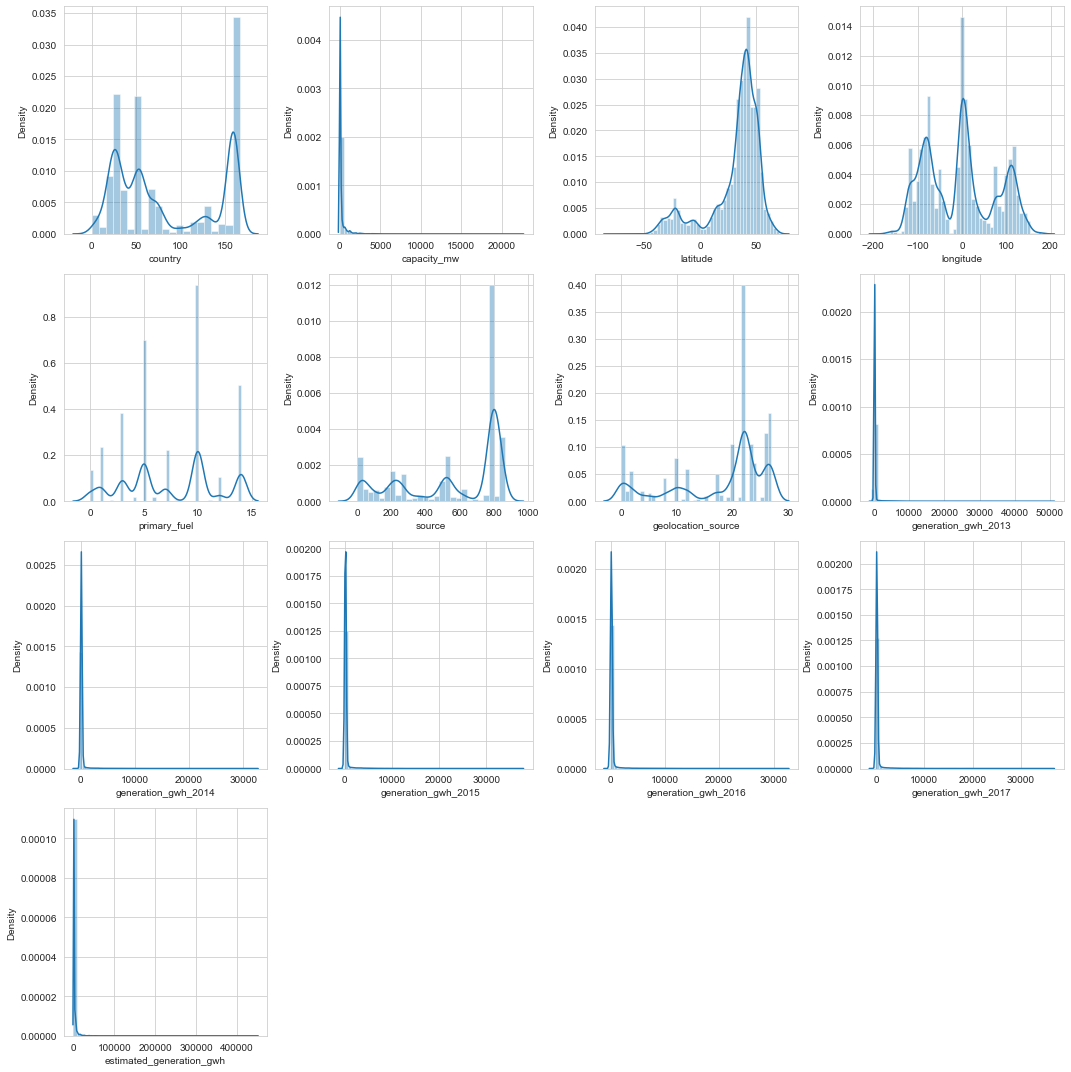

In [40]:
# Checking data Distribution

plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

We can see through distplots we need to remove skewness before model fitting

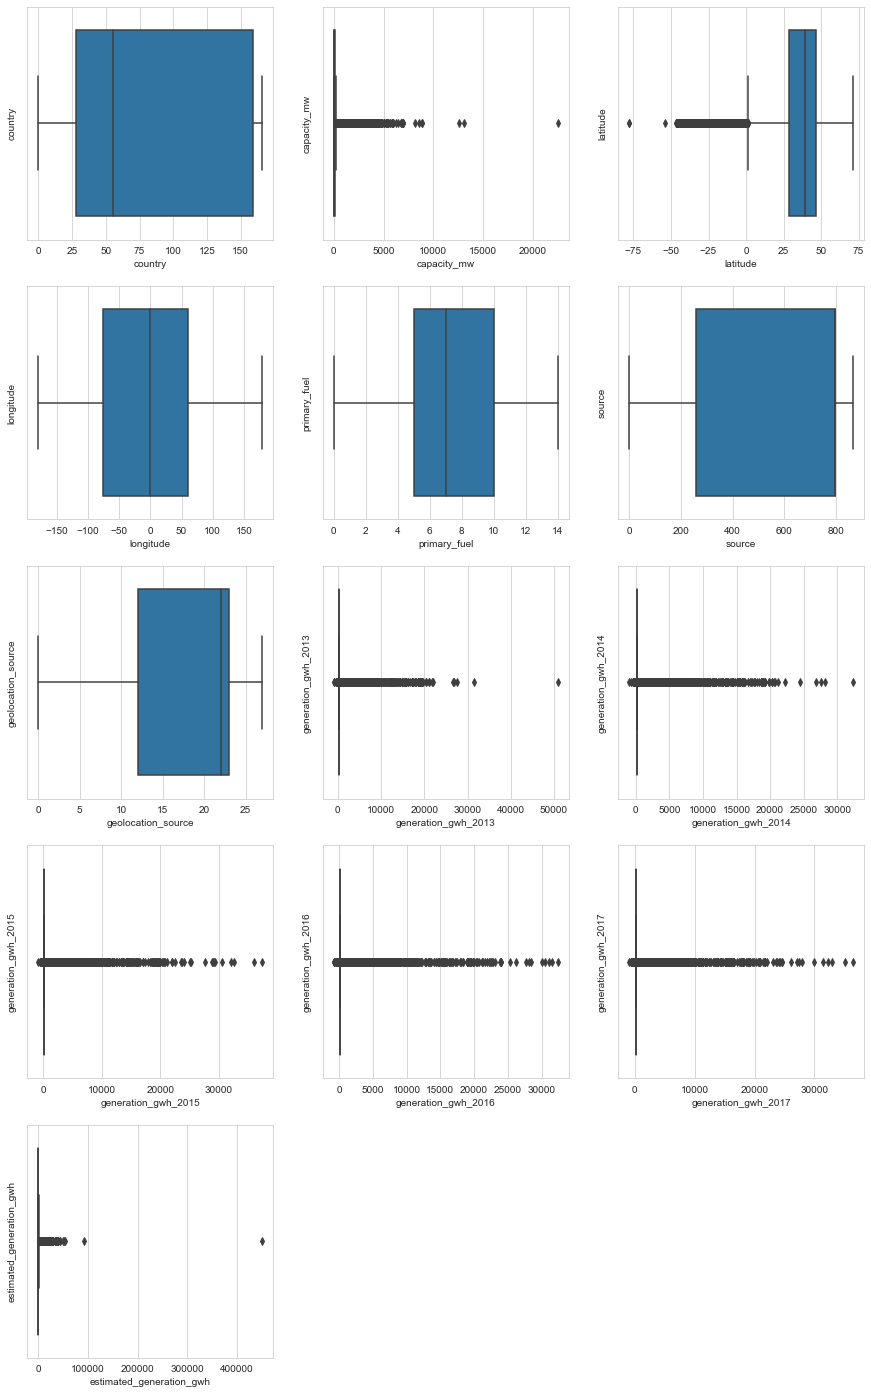

In [41]:
 #Checking for outliers

plt.figure(figsize = (15,30))
graph = 1

for column in df:
    if graph <=13:
        ax = plt.subplot(6,3,graph)
        sns.boxplot(df[column], orient ='h')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graph+=1   
plt.show()

As we have more of categorical columns we cant visulize box plots as such but still we need to remove extreme values so applying z-squre

In [42]:
df.columns

Index(['country', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'source', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'estimated_generation_gwh'],
      dtype='object')

In [43]:
# Removing outliers with Z-score


                 
from scipy.stats import zscore

z_score = zscore(df[['capacity_mw','latitude','estimated_generation_gwh']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df= df[filtering_entry]

In [44]:
df.shape

(32535, 13)

In [45]:

# Checking data lost

print ('Data lost = ', ((33561-32535)/33561)*100 , '%')

Data lost =  3.057119871279163 %


In [46]:
# Checking skewness

df.skew()

country                      0.356448
capacity_mw                  3.326428
latitude                    -1.553901
longitude                    0.242952
primary_fuel                -0.034725
source                      -0.722353
geolocation_source          -1.051448
generation_gwh_2013         10.390030
generation_gwh_2014         10.286842
generation_gwh_2015          8.866143
generation_gwh_2016          9.313047
generation_gwh_2017          8.738537
estimated_generation_gwh     4.752826
dtype: float64

We have high skewness in our columns we need to remove it before model building

In [47]:
# Removing skewness with Power Transform

from sklearn.preprocessing import power_transform
df_new = power_transform(df)

df=pd.DataFrame(df_new, columns=df.columns)

df.skew()

country                    -0.086830
capacity_mw                 0.103606
latitude                   -0.799355
longitude                   0.113647
primary_fuel               -0.203469
source                     -0.687614
geolocation_source         -0.795223
generation_gwh_2013        -0.431651
generation_gwh_2014        -0.201413
generation_gwh_2015        -1.435665
generation_gwh_2016        -1.182934
generation_gwh_2017        -2.172357
estimated_generation_gwh    0.000012
dtype: float64

### Model - 1 // Taking capacity_mw as Target

In [48]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [49]:
print(x.shape)
print(y.shape)

(32535, 12)
(32535,)


In [50]:
# CHECKING THE BEST RANDOM STATE FOR DATA SPLIT
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [51]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.5730967587459955
At random state 0, The test accuracy is: 0.5409553559689027


At random state 1, The training accuracy is: 0.5589109618688859
At random state 1, The test accuracy is: 0.5786625475595741


At random state 2, The training accuracy is: 0.5610680636894858
At random state 2, The test accuracy is: 0.573049175324177


At random state 3, The training accuracy is: 0.5673253524731194
At random state 3, The test accuracy is: 0.5581024470271756


At random state 4, The training accuracy is: 0.5670816486127699
At random state 4, The test accuracy is: 0.5570964427818706


At random state 5, The training accuracy is: 0.560961411021081
At random state 5, The test accuracy is: 0.5728727835248906


At random state 6, The training accuracy is: 0.5679991862741368
At random state 6, The test accuracy is: 0.5571469584155382


At random state 7, The training accuracy is: 0.567936007723411
At random state 7, The test accuracy is: 0.55737134815635

At random state 72, The training accuracy is: 0.567965174022821
At random state 72, The test accuracy is: 0.5569987831074974


At random state 73, The training accuracy is: 0.5703711608597501
At random state 73, The test accuracy is: 0.5499726127219663


At random state 74, The training accuracy is: 0.5638210304352264
At random state 74, The test accuracy is: 0.5674428554539612


At random state 75, The training accuracy is: 0.5745812203096967
At random state 75, The test accuracy is: 0.5389069994391197


At random state 76, The training accuracy is: 0.5668595391446035
At random state 76, The test accuracy is: 0.5599300699237355


At random state 77, The training accuracy is: 0.558490410820333
At random state 77, The test accuracy is: 0.5793925558290685


At random state 78, The training accuracy is: 0.5591720311048964
At random state 78, The test accuracy is: 0.5771049883754091


At random state 79, The training accuracy is: 0.5717120211113665
At random state 79, The test accuracy is:

At random state 137, The test accuracy is: 0.5737505402341148


At random state 138, The training accuracy is: 0.5595467776966403
At random state 138, The test accuracy is: 0.5769499010435133


At random state 139, The training accuracy is: 0.5627054127616852
At random state 139, The test accuracy is: 0.5688220518062705


At random state 140, The training accuracy is: 0.5592696480019923
At random state 140, The test accuracy is: 0.5764458384667293


At random state 141, The training accuracy is: 0.5669474620383765
At random state 141, The test accuracy is: 0.5594765110774207


At random state 142, The training accuracy is: 0.5555770286918265
At random state 142, The test accuracy is: 0.5858898231881486


At random state 143, The training accuracy is: 0.5687398540943915
At random state 143, The test accuracy is: 0.5555277929488732


At random state 144, The training accuracy is: 0.564100292993323
At random state 144, The test accuracy is: 0.5667698509934591


At random state 145, The tr

At random state 201, The test accuracy is: 0.5582801613563035


At random state 202, The training accuracy is: 0.566104038569595
At random state 202, The test accuracy is: 0.5615228614926884


At random state 203, The training accuracy is: 0.5626218064436737
At random state 203, The test accuracy is: 0.5692509328849362


At random state 204, The training accuracy is: 0.5633694188385158
At random state 204, The test accuracy is: 0.5675496528774302


At random state 205, The training accuracy is: 0.5655594251810766
At random state 205, The test accuracy is: 0.5629658713953143


At random state 206, The training accuracy is: 0.5654902993396456
At random state 206, The test accuracy is: 0.563075615635817


At random state 207, The training accuracy is: 0.5653765542401046
At random state 207, The test accuracy is: 0.563547406337409


At random state 208, The training accuracy is: 0.5664417071323391
At random state 208, The test accuracy is: 0.5598144095037224


At random state 209, The trai

At random state 273, The test accuracy is: 0.5498768117718826


At random state 274, The training accuracy is: 0.5607913259976146
At random state 274, The test accuracy is: 0.572980063351662


At random state 275, The training accuracy is: 0.5677234748496933
At random state 275, The test accuracy is: 0.5578266086375201


At random state 276, The training accuracy is: 0.5660718753126046
At random state 276, The test accuracy is: 0.561479504101597


At random state 277, The training accuracy is: 0.5624442966076214
At random state 277, The test accuracy is: 0.5692779386630278


At random state 278, The training accuracy is: 0.5615870431787466
At random state 278, The test accuracy is: 0.5713716952836508


At random state 279, The training accuracy is: 0.5626453502088844
At random state 279, The test accuracy is: 0.568178421451038


At random state 280, The training accuracy is: 0.5590681466108924
At random state 280, The test accuracy is: 0.5772565921185635


At random state 281, The trai

At random state 337, The test accuracy is: 0.5750681050038844


At random state 338, The training accuracy is: 0.563938381460092
At random state 338, The test accuracy is: 0.56617352911973


At random state 339, The training accuracy is: 0.5619145665894036
At random state 339, The test accuracy is: 0.5707215128506936


At random state 340, The training accuracy is: 0.5600326366785111
At random state 340, The test accuracy is: 0.5742296821574507


At random state 341, The training accuracy is: 0.5649538143792954
At random state 341, The test accuracy is: 0.5638715686603929


At random state 342, The training accuracy is: 0.5651983201724218
At random state 342, The test accuracy is: 0.562874511993789


At random state 343, The training accuracy is: 0.5645109372775697
At random state 343, The test accuracy is: 0.565500963943443


At random state 344, The training accuracy is: 0.5711463710967077
At random state 344, The test accuracy is: 0.5481001051363735


At random state 345, The traini

In [52]:
#splitting the data with best random state 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=292)

In [53]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

0.5660343322920476
MSE: 0.4384532810939719
MAE: 0.501041159859655
r2_score: 0.2113958659847247


In [54]:
# Ridge:¶
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))



0.5660343304661128
MSE: 0.43845256416608736
MAE: 0.501044764454061
r2_score: 0.21132887473568474


In [55]:
# SVR
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

0.5383154798239476
MSE: 0.4666590429143103
MAE: 0.48387782129631307
r2_score: 0.3334823823154456


In [55]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

0.9911028084865321
MSE: 0.06008610481127143
MAE: 0.11040569123204014
r2_score: 0.9357329339797384


In [56]:
#GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

0.8630499428582317
MSE: 0.13994237073093208
MAE: 0.26293633073099054
r2_score: 0.8200568662663057


In [58]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv=8)
print("Cross validation score for Linear Regression is", scr.mean())
scr = cross_val_score(R, x,y, cv=8)
print("Cross validation score for Ridge is", scr.mean())
scr = cross_val_score(svr, x,y, cv=8)
print("Cross validation score for SVR is", scr.mean())
scr = cross_val_score(RF, x,y, cv=8)
print("Cross validation score for RandomForestRegressor is", scr.mean())

Cross validation score for Linear Regression is 0.4969305661231755
Cross validation score for Ridge is 0.4969303650404897
Cross validation score for SVR is 0.48002617675001436
Cross validation score for RandomForestRegressor is 0.7737379652125261


In [56]:
scr = cross_val_score(GBR, x,y, cv=8)
print("Cross validation score for GradientBoostingRegressor is", scr.mean())

Cross validation score for GradientBoostingRegressor is 0.7511380634170298


HyperParameter tunning for Random Forest with  GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {'n_estimators':[9,13,15,20,25,],
         'max_depth':[8,10,15,20],
         'min_samples_split':[10,12,8,14],
         'min_samples_leaf':[5,6,7,9]
         }

In [60]:
grd = GridSearchCV(RF,param_grid=params)

In [61]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 10, 15, 20],
                         'min_samples_leaf': [5, 6, 7, 9],
                         'min_samples_split': [10, 12, 8, 14],
                         'n_estimators': [9, 13, 15, 20, 25]})

In [62]:
print('Best Params', grd.best_params_)

Best Params {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 25}


In [63]:
grid_best = RandomForestRegressor(n_estimators=25,max_depth = 20, min_samples_leaf=5,min_samples_split=10, )
# Fitting model with best parameters

In [68]:
grid_best.fit(x_train,y_train)

y_pred = grid_best.predict(x_test)

print('MSE:',mean_squared_error(y_pred,y_test))
print('MAE:',mean_absolute_error(y_pred,y_test))
print('r2_score:',r2_score(y_pred,y_test))

MSE: 0.06931796323154267
MAE: 0.12882248115693007
r2_score: 0.9246526607733003


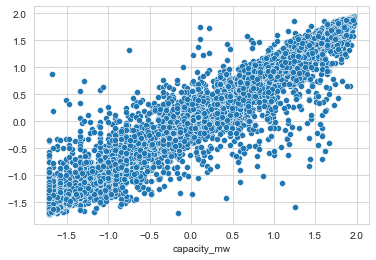

In [67]:
sns.scatterplot(y_test, y_pred) # Checking predicted vs Actual
plt.show()

### TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL

In [4]:
df1 = pd.read_csv(r"C:\Users\Abhijeet\Desktop\My Data\Datasets\global-power-plant-database-master\output_database\global_power_plant_database.csv")

In [5]:
df1.drop(['country_long', 'name', 'gppd_idnr', 'other_fuel1', 'other_fuel2', 'other_fuel3','url', 'wepp_id','commissioning_year','owner','year_of_capacity_data','generation_data_source'], axis = 1 , inplace = True)

In [6]:
df1.drop_duplicates(inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['source'] = df1['source'].fillna('U.S. Energy Information Administration')
df1['geolocation_source'] = df1['geolocation_source'].fillna('U.S. Energy Information Administration')
df1.fillna(df1.mean()[0], inplace=True)
le = LabelEncoder()
df1['country']=le.fit_transform(df1['country'])

df1['primary_fuel']=le.fit_transform(df1['primary_fuel'])

df1['source']=le.fit_transform(df1['source'])

df1['geolocation_source']=le.fit_transform(df1['geolocation_source'])


In [10]:
x=df1.drop(['primary_fuel'],axis=1)
y=df1['primary_fuel']

In [11]:
x

,country,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,0,33.0,32.3220,65.1190,262,10,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
1,0,10.0,31.6700,65.7950,837,27,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
2,0,10.0,31.6230,65.7920,837,27,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
3,0,66.0,34.5560,69.4787,262,10,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
4,0,100.0,34.6410,69.7170,262,10,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
...,...,...,...,...,...,...,...,...,...,...,...,...
33638,165,50.0,-12.9667,28.6333,220,21,169.239291,169.239291,169.239291,169.239291,169.239291,120.872642
33639,165,20.0,-12.8167,28.2000,220,21,169.239291,169.239291,169.239291,169.239291,169.239291,48.349057
33640,165,108.0,-17.9167,25.8500,220,21,169.239291,169.239291,169.239291,169.239291,169.239291,702.100000
33641,166,920.0,-18.3835,26.4700,262,10,169.239291,169.239291,169.239291,169.239291,169.239291,4397.000000


In [12]:
y

0         5
1        10
2        10
3         5
4         5
         ..
33638     7
33639     7
33640     5
33641     1
33642     5
Name: primary_fuel, Length: 33561, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=292)

In [15]:
x

,country,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,0,33.0,32.3220,65.1190,262,10,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
1,0,10.0,31.6700,65.7950,837,27,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
2,0,10.0,31.6230,65.7920,837,27,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
3,0,66.0,34.5560,69.4787,262,10,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
4,0,100.0,34.6410,69.7170,262,10,169.239291,169.239291,169.239291,169.239291,169.239291,169.239291
...,...,...,...,...,...,...,...,...,...,...,...,...
33638,165,50.0,-12.9667,28.6333,220,21,169.239291,169.239291,169.239291,169.239291,169.239291,120.872642
33639,165,20.0,-12.8167,28.2000,220,21,169.239291,169.239291,169.239291,169.239291,169.239291,48.349057
33640,165,108.0,-17.9167,25.8500,220,21,169.239291,169.239291,169.239291,169.239291,169.239291,702.100000
33641,166,920.0,-18.3835,26.4700,262,10,169.239291,169.239291,169.239291,169.239291,169.239291,4397.000000


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=292)

In [17]:
# Classification model building
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [18]:
# Logistic Regression

LR=LogisticRegression()
LR_score=cross_val_score(LR,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(LR_score))

LR.fit(x_train,y_train)
LR_predicted=LR.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

cross validation score: 0.3659001125136203
0.431621809514351
[[   2    8    0  169    0   89    0    0    0    0  119    0    0    0
    29]
 [   0  398    0   88    0  176    9    0    0    0   16    0    0    0
     8]
 [   0    0    0    0    0    9    0    0    0    0    2    0    0    0
     0]
 [   3  134    0  301    0  600    1    0    0    0  113    0    0    0
    29]
 [   0    2    0    6    0   45    0    0    0    0    3    0    0    0
     0]
 [  12  127    0  362    0  815    1    1    0    0  597    2    0    0
   174]
 [   0   47    0    9    0    5    8    0    0    0    0    0    0    0
     1]
 [  34   33    0  254    0  234    0   13    0    0   96    0    0    0
    28]
 [   0    0    0    2    0   10    0    0    0    0    1    0    0    0
     0]
 [   0    0    0    0    0    3    0    0    0    0    0    0    0    0
     0]
 [   0   11    0   23    0  274    0    2    0    0 2508    0    0    0
   103]
 [   0    0    0    0    0    0    0    0    0    0   14   

In [19]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

cross validation score for svm: 0.4769826064631502
0.8060383354851525
[[ 275    2    1   13    1   65    0   19    0    0    9    0   13    0
    18]
 [   4  512    0   83    1   46    7   12    0    0    6    0    8    0
    16]
 [   2    0    3    3    0    1    0    0    0    0    0    0    2    0
     0]
 [  17   68    4  747    7  150    5   84    6    5   15    5   29    0
    39]
 [   1    1    0    8   29    8    0    2    1    0    3    0    1    0
     2]
 [  64   41    1  128   15 1637    3   60    2    0   30    3   40    0
    67]
 [   0   18    0    6    0    4   39    3    0    0    0    0    0    0
     0]
 [  28    9    0   97    6   63    1  458    1    0    9    0    4    0
    16]
 [   1    0    0    4    0    1    0    0    2    0    0    0    2    0
     3]
 [   0    0    0    1    0    0    0    0    0    0    0    0    1    0
     1]
 [   3    6    0   10    0   23    0    2    0    0 2835    0    7    0
    35]
 [   0    2    0    0    0    1    0    1    0    

In [20]:
# Knn Classifier
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

cross validation score for knn: 0.43285541973155456
0.7717747541960472
[[ 247    7    0   14    1   74    0   26    0    0    6    0   11    1
    29]
 [   5  491    0  101    1   56    8    6    0    0    3    0    9    0
    15]
 [   1    0    0    2    0    4    0    0    0    0    2    0    1    0
     1]
 [  16  125    1  699    5  166    1   68    0    0   38    0   18    0
    44]
 [   2    4    0   16   12    9    0    0    0    0    4    0    4    0
     5]
 [  68   86    1  149    4 1604    3   45    0    0   44    0   23    0
    64]
 [   0   39    0    4    0    5   22    0    0    0    0    0    0    0
     0]
 [  31   24    0   82    4  112    1  411    0    0   13    0    6    0
     8]
 [   2    0    0    4    0    4    0    1    0    0    0    0    1    0
     1]
 [   0    0    0    0    0    0    0    1    0    0    0    0    1    0
     1]
 [   8    5    0   18    5   35    0   14    0    0 2799    0    2    0
    35]
 [   0    0    0    0    0    0    0    0    0   

In [21]:
# Random Forest Classifier
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

cross validation score for rfc: 0.5106815720729015
0.8650312841394379
[[ 276    1    0   12    0   76    0   21    0    0    7    1    8    0
    14]
 [   3  538    0   82    0   41    5    2    0    0    1    0    6    0
    17]
 [   0    0    2    4    0    2    0    0    0    0    0    0    2    0
     1]
 [   3   40    1  902    3  124    0   54    1    0    5    0   19    0
    29]
 [   0    2    0    9   28    8    0    3    0    0    1    0    1    0
     4]
 [  32   31    0   83    3 1847    0   36    0    0   21    0   15    0
    23]
 [   0   21    0    9    0    6   34    0    0    0    0    0    0    0
     0]
 [  11    1    0   80    3   54    0  527    3    0    4    0    2    0
     7]
 [   2    0    0    6    0    3    0    0    1    0    0    1    0    0
     0]
 [   0    0    0    3    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    8    0   14    0    1    0    0 2879    0    1    0
    18]
 [   0    0    0    0    0    0    0    0    0    

As We can see random forest classifier performing better going for hyperparameter tunning for the same

In [22]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [23]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [24]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8644353957691926


In [25]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

In [26]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [27]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [28]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8644353957691926


In [29]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))



CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.83      0.66      0.73       416
           1       0.84      0.78      0.81       695
           2       0.67      0.18      0.29        11
           3       0.72      0.76      0.74      1181
           4       0.76      0.46      0.58        56
           5       0.81      0.89      0.85      2091
           6       0.88      0.54      0.67        70
           7       0.80      0.76      0.78       692
           8       0.25      0.08      0.12        13
           9       0.00      0.00      0.00         3
          10       0.97      0.99      0.98      2921
          11       0.88      1.00      0.93        14
          12       0.78      0.65      0.71       329
          13       1.00      0.40      0.57         5
          14       0.92      0.91      0.92      1572

    accuracy                           0.86     10069
   macro avg       0.74      0.60      0.64     10069
w

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.899565 (macro),
0.940492 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.915251 (macro),
0.985296 (weighted by prevalence)


In [33]:
import joblib
joblib.dump(best_rfc_grid.best_estimator_,'Global Power Plant Classification.obj')

['Global Power Plant Classification.obj']